# Import Libraries & Load dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Adidas US Sales Datasets.xlsx")

In [3]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [4]:
df.shape

(9648, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


# Checking Null Values

In [6]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [7]:
#checking distribution of numerical features

<AxesSubplot: xlabel='Total Sales', ylabel='Count'>

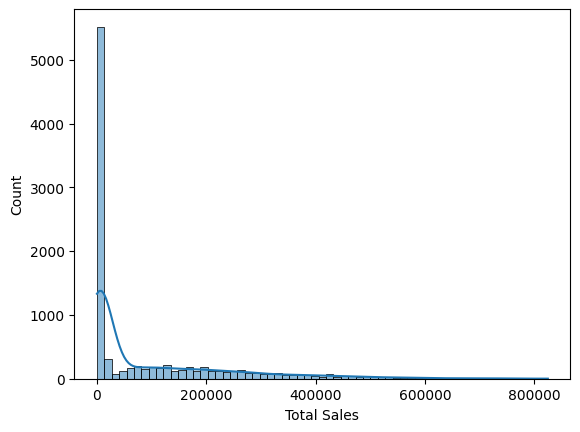

In [9]:
sns.histplot(x='Total Sales',data=df, kde=True)

In [10]:
#finding outliers using Boxplot

<AxesSubplot: xlabel='Total Sales'>

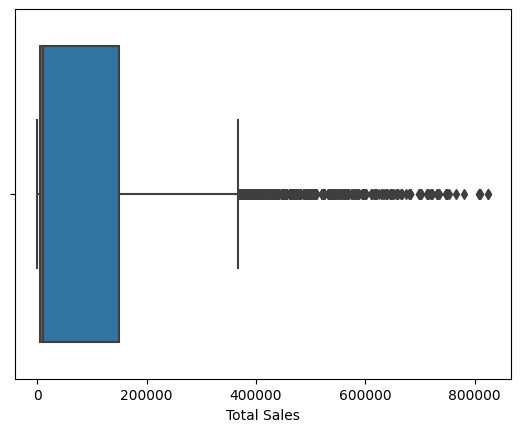

In [11]:
sns.boxplot(x='Total Sales',data=df)

In [12]:
#Findings
#1. Data is not normally distributed
#2. Outliers are available 
#3. We need to use IQR technique to handle the outliers.

In [13]:
#There are two different techniques to handle the outliers
#1. Capping outliers
#2. Trimming Outliers

In [15]:
#1. Capping outliers (IQR Method)

percentile_25 = df['Total Sales'].quantile(0.25)
percentile_75 = df['Total Sales'].quantile(0.75)
IQR = percentile_75 - percentile_25

upper_limit = percentile_75 + 1.5*IQR
lower_limit = percentile_25 - 1.5*IQR

In [16]:
print(percentile_25)
print(percentile_75)
print(IQR)
print(upper_limit)
print(lower_limit)

4254.5
150000.0
145745.5
368618.25
-214363.75


In [19]:
#finding outlier datapoints

df[(df['Total Sales']>upper_limit) | (df['Total Sales']<lower_limit)]

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3831,Amazon,1185732,2021-05-17,Northeast,New Hampshire,Manchester,Men's Street Footwear,65.0,595,386750.0,154700.0,0.40,In-store
3837,Amazon,1185732,2021-06-19,Northeast,New Hampshire,Manchester,Men's Street Footwear,65.0,675,438750.0,175500.0,0.40,In-store
3843,Amazon,1185732,2021-07-17,Northeast,New Hampshire,Manchester,Men's Street Footwear,65.0,700,455000.0,182000.0,0.40,In-store
3849,Amazon,1185732,2021-08-18,Northeast,New Hampshire,Manchester,Men's Street Footwear,65.0,675,438750.0,175500.0,0.40,Outlet


In [20]:
#653 datapoints are found as outliers
#We have to cap these outliers


In [21]:
new_df_cap = df.copy()

In [22]:
new_df_cap['Total Sales'] = np.where(
    new_df_cap['Total Sales']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Total Sales']<lower_limit,
        lower_limit,
        new_df_cap['Total Sales']
    )
)
    

<AxesSubplot: xlabel='Total Sales'>

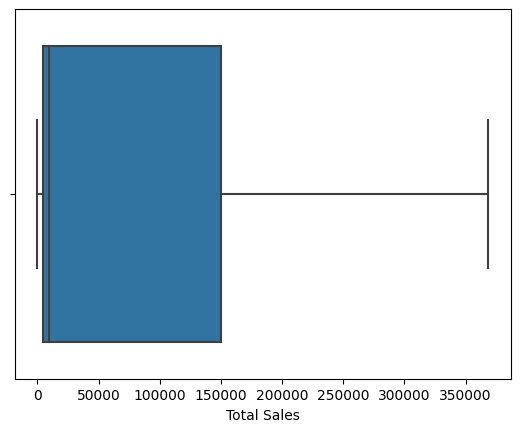

In [24]:
sns.boxplot(x='Total Sales',data=new_df_cap)

<AxesSubplot: xlabel='Total Sales', ylabel='Count'>

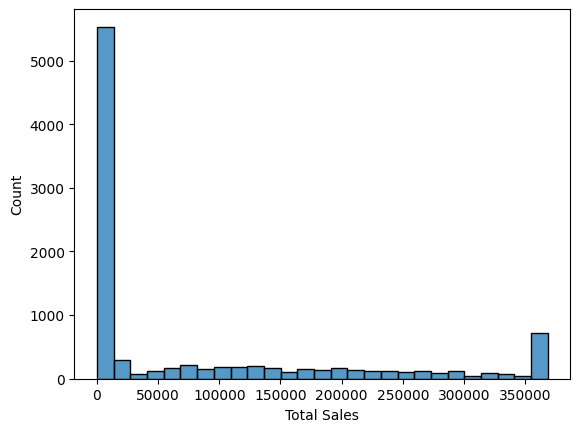

In [26]:
sns.histplot(x='Total Sales',data=new_df_cap)

In [27]:
#findings
# All outliers are capped
# there is no outliers found in the boxplot
# Last bin of Histogram showing Capped outliers

In [29]:
#Trimming Outliers

df_trim = df[(df['Total Sales']<upper_limit) & (df['Total Sales']>lower_limit)]

In [33]:
df_trim.shape

(8995, 13)

In [34]:
df.shape

(9648, 13)

In [ ]:
#  May result in loss of important information if the data points are Trimmed.